## Introduction to Statsmodels API: Part A

1.   List item
2.   List item



1.   List item
2.   List item



Statsmodels is a package that is built specifically for statistics. It's built on SciPy and NumPy. We can use it to fit models. It's also great for statistical analysis.

In [2]:
# Installing statsmodels into my computer
!pip3 install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.0 MB/s eta 0:00:00


## Step 1: Importing Libraries



Let's go ahead and import data and build a model on top of it using statsmodels.

- Import the NumPy library for numerical operations
- Import the statsmodels.api and statsmodels.formula.api libraries for statistical modeling


In [3]:
import numpy as np
import statsmodels.api as sm

## Step 2: Loading the Dataset

- Load the inbuilt dataset **Guerry** from the **HistData** package
- Display the first few rows of the data using **head()**


In [5]:
data = sm.datasets.get_rdataset('Guerry','HistData').data

In [6]:
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [7]:
type(data)

pandas.core.frame.DataFrame

## Step 3: Building the Model

Let's build a model by using the natural log of one of the regressions that are available in statsmodels.

- Call **ols()** function from statsmodels.formula.api to build a linear regression model using the inbuilt dataset
- The dependent variable is **Lottery**
- The independent variables are **Literacy** and the natural logarithm of **Pop1831**
- Call the **fit()** method to fit the model to the data


In [9]:
data["Lottery"].describe()

count    86.000000
mean     43.500000
std      24.969982
min       1.000000
25%      22.250000
50%      43.500000
75%      64.750000
max      86.000000
Name: Lottery, dtype: float64

In [10]:
data["Literacy"].describe()

count    86.000000
mean     39.255814
std      17.364051
min      12.000000
25%      25.000000
50%      38.000000
75%      51.750000
max      74.000000
Name: Literacy, dtype: float64

In [11]:
data.shape

(86, 23)

In [12]:
data["Pop1831"]

count     86.000000
mean     378.628721
std      148.777230
min      129.100000
25%      283.005000
50%      346.165000
75%      444.407500
max      989.940000
Name: Pop1831, dtype: float64

In [15]:
# total population, maybe it's by 1000 (32 million people total)
sum(data["Pop1831"]) * 1000

32562070.000000007

In [8]:
import statsmodels.formula.api as smf
# smf.ols expects an r-language formatted formulat
## https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html
## string format = Dependent variable ~ Independent variable + "Y = mX + b"

results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)',data = data).fit()

In [24]:
# Another way to do with documentation here
## https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.regression.linear_model as lin_model

# create the np.log(population)
data["log_pop"] = np.log(data["Pop1831"])
results_refactor = lin_model.OLS(data["Lottery"], data.loc[:, ["Literacy", "log_pop"]]).fit()

In [31]:
import pandas as pd
import statsmodels.api as sm

# chat gpt generated code, hope there aren't too many hallucinations!!!
X1 = data['Literacy'] # first independent variable

# Using numpy's log function to give natural log conversion of Pop1831
## https://numpy.org/doc/stable/reference/generated/numpy.log.html
X2 = np.log(data['Pop1831']) # second independetn variable

# Combine the independent variables into a DataFrame
X = pd.DataFrame({'Literacy': X1, 'Log_Pop1831': X2})

# Add a constant term (intercept), it's matches the R-formula results better here
## https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html
X = sm.add_constant(X)

# Specify the dependent variable
Y = data['Lottery']

# Fit the linear regression model
# y(lottery) = mX(literacy rate) + m2X(log population size of department) + constant
chatpt_results = sm.OLS(Y, X).fit()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<Axes: xlabel='Lottery', ylabel='Literacy'>

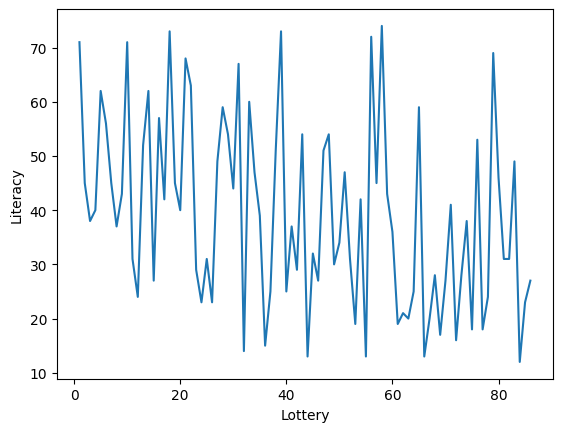

In [35]:

sns.lineplot(x=data['Lottery'], y=data["Literacy"])

In [33]:
X.head()

,Literacy,Log_Pop1831
0,37,5.846525
1,51,6.240276
2,13,5.697966
3,46,5.049215
4,69,4.860587


In [26]:
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831,log_pop
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,60,69,41,55,46,13,218.372,5762,346.03,5.846525
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,82,36,38,82,24,327,65.945,7369,513.00,6.240276
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,42,76,66,16,85,34,161.927,7340,298.26,5.697966
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,12,37,80,32,29,2,351.399,6925,155.90,5.049215
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,23,64,79,35,7,1,320.280,5549,129.10,4.860587


## Step 4: Analyzing the Model Results

Now, let's display the summary of the regression results.


In [20]:
#Display the summary of the regression results
results_output = results.summary()
results_output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.90e-08
Time:                        02:08:32   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# They should be the same
results_refactor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Lottery   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              123.1
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    1.08e-25
Time:                        02:23:23   Log-Likelihood:                         -399.75
No. Observations:                  86   AIC:                                      803.5
Df Residuals:                      84   BIC:                                      808.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Literacy      -0.4093      0.159     -2.570      0.012      -0.726      -0.093
log_pop        9.9875      1.162      8.599      0.000       7.678      12.297
==============================================================================
Omnibus:                        6.346   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.849
Skew:                           0.129   Prob(JB):                        0.241
Kurtosis:                       2.146   Cond. No.                         18.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
chatpt_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Lottery   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              123.1
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    1.08e-25
Time:                        02:33:29   Log-Likelihood:                         -399.75
No. Observations:                  86   AIC:                                      803.5
Df Residuals:                      84   BIC:                                      808.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Literacy       -0.4093      0.159     -2.570      0.012      -0.726      -0.093
Log_Pop1831     9.9875      1.162      8.599      0.000       7.678      12.297
==============================================================================
Omnibus:                        6.346   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.849
Skew:                           0.129   Prob(JB):                        0.241
Kurtosis:                       2.146   Cond. No.                         18.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
type(results_output)

statsmodels.iolib.summary.Summary

**Observation**

The OLS regression results give the details about the following:
- The model used
- The dependent variable
- The value of R-squared, adjusted R-squared, AIC, BIC and other statistical information needed to judge the model